In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from skgstat import models



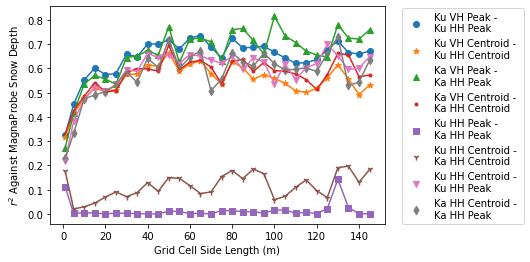

In [23]:
path = '/Users/rosie/Documents/papers/mac_rosie_mosaic/' #path to r_summ_binsizeX.p files
save_fig_path = '/Users/rosie/Documents/papers/mac_rosie_mosaic/' #path to save figure
binsizes = np.insert(np.arange(5,150,5),0,1)


r_summ = pickle.load( open(path + 'summ_dates_binsize50.p', "rb" ) )
methods = [key for key in r_summ['']]
# line_sym = ['-bo', '-r*', '-y^', '-g.', '-cs', '-m1', '-kv', '-b>']
col = ['b', 'r', 'y', 'g', 'c', 'm', 'k', 'grey']
sym = ['o', '*', '^', '.', 's', '1', 'v', 'd']

for i in range(len(methods)-2):
    m = methods[i+2]
    to_plot = []
    for size in binsizes:
        file = 'summ_dates_binsize' + str(size) + '.p'
        r_summ = pickle.load( open(path + file, "rb" ) )
        to_plot.append(r_summ[''][m][2]**2)
    plt.plot(binsizes, to_plot)
    plt.scatter(binsizes, to_plot, marker = sym[i], label = m[25:-4])

#     plt.plot(binsizes, to_plot, line_sym[i], label = m[25:-4])
plt.xlabel('Grid Cell Side Length (m)')
plt.ylabel('$r^2$ Against MagnaProbe Snow Depth')
lgd = plt.legend(loc = [1.05, 0])
plt.savefig(save_fig_path + 'lengthscales_r2.jpg', 
            bbox_extra_artists=(lgd,), bbox_inches='tight',
                                        dpi = 300)